In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv('Dataset .csv')

In [75]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [76]:
df.info

<bound method DataFrame.info of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul

In [77]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [78]:
df.duplicated().sum()

0

In [79]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [80]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

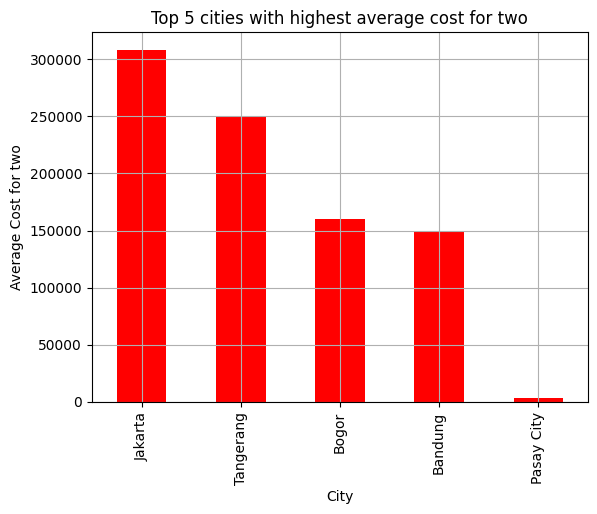

In [81]:
#Group by city and calculate average price
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head().plot(kind='bar',color='red')
plt.title('Top 5 cities with highest average cost for two')
plt.xlabel('City')
plt.ylabel('Average Cost for two')
plt.grid()
plt.show()

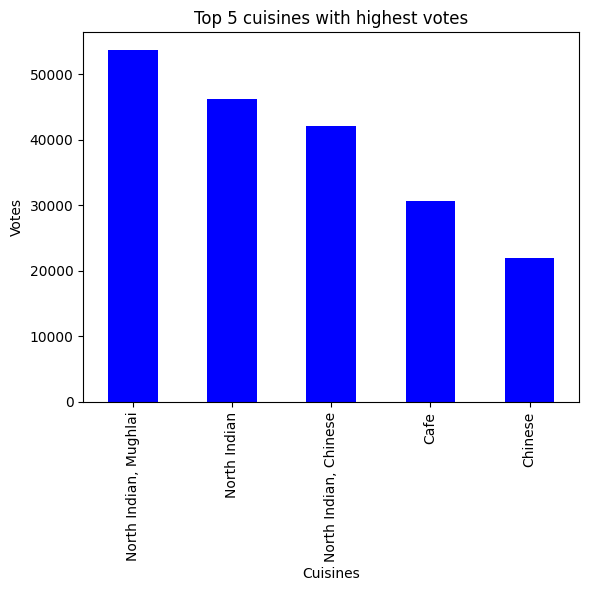

In [82]:
#Cusinine count
df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head().plot(kind='bar',color='blue')
plt.title('Top 5 cuisines with highest votes')
plt.xlabel('Cuisines')
plt.ylabel('Votes')

plt.show()

In [83]:
data_Cuisines_Votes = df.groupby('Cuisines')['Votes'].sum().reset_index()


In [84]:
data_Cuisines_Votes[data_Cuisines_Votes['Votes']!=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


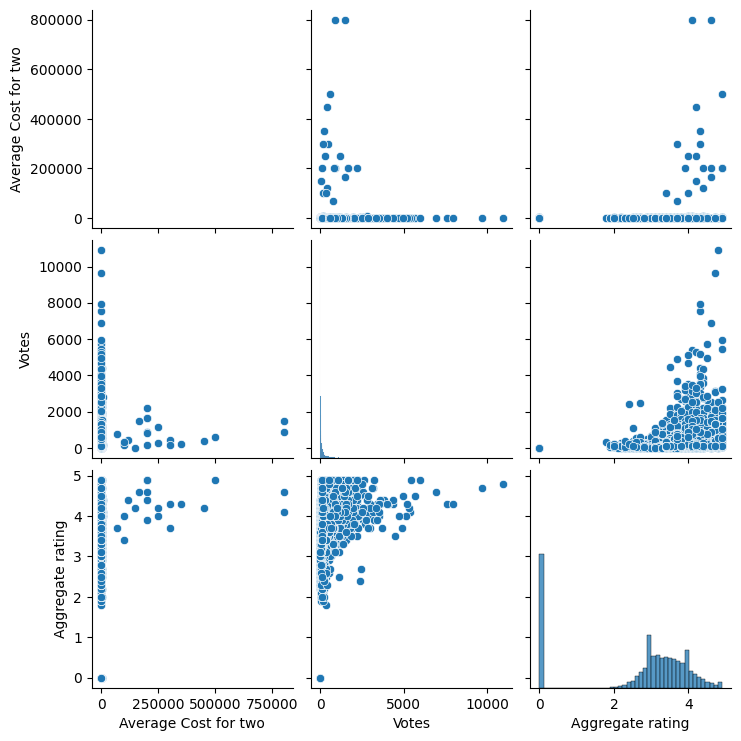

In [85]:
sns.pairplot(data=df[["Average Cost for two", "Votes", "Aggregate rating"]])

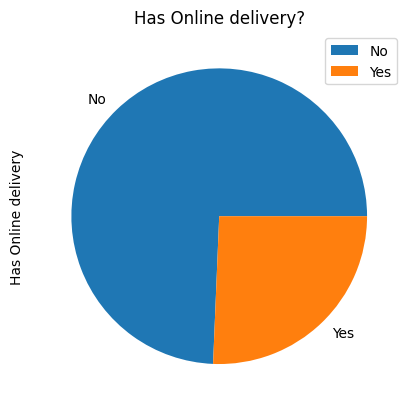

In [86]:
df["Has Online delivery"].value_counts().plot(kind='pie')
plt.title('Has Online delivery?')
plt.legend()
plt.show()


In [87]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [88]:
df[['Aggregate rating','Rating text']].sort_values(by='Aggregate rating',ascending=False).head(7000)

,Aggregate rating,Rating text
1381,4.9,Excellent
589,4.9,Excellent
374,4.9,Excellent
9303,4.9,Excellent
9299,4.9,Excellent
...,...,...
9062,2.6,Average
1133,2.6,Average
3301,2.6,Average
6268,2.6,Average


In [89]:
df= df[df["Rating text"] != "Not rated"]

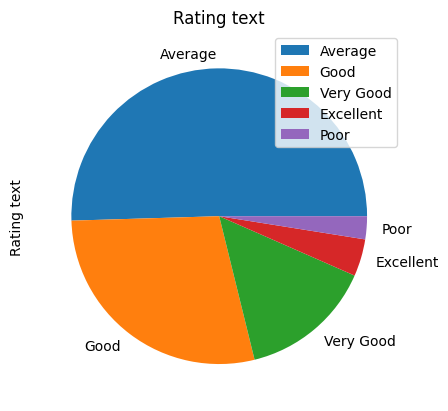

In [90]:
df["Rating text"].value_counts().plot(kind='pie')
plt.title('Rating text')
plt.legend()
plt.show()

In [91]:
X=df[['Average Cost for two','Has Table booking','Has Online delivery','Price range']]

In [92]:
#above 2 and below 2.5 Poor
#above 2.5 and below 3.5 Average
#above 3.5 and below 4.0 Good
#above 4.0 and below 4.5 Very Good
#above 4.5 Excellent

In [93]:
y= df[["Aggregate rating"]]

In [94]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [95]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [96]:
X['Has Table booking']=labelencoder.fit_transform(X['Has Table booking'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_16252\3278653462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Table booking']=labelencoder.fit_transform(X['Has Table booking'])


In [97]:
#Has Table booking 0 is no 1 is yes
X['Has Online delivery']=labelencoder.fit_transform(X['Has Online delivery'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_16252\1069125123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Online delivery']=labelencoder.fit_transform(X['Has Online delivery'])


In [98]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [100]:
X=scaler.fit_transform(X)

In [101]:
from sklearn.model_selection import train_test_split


In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [103]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [104]:
def modelresults(predictions):
    print("Mean Squared Error:{}".format(mean_squared_error (y_test, predictions)))
    print('Root Mean Squared Error:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

In [105]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [106]:
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
predictions_from_lr = lr.predict(X_test)

In [108]:
modelresults(predictions_from_lr)

Mean Squared Error:0.2514371533659662
Root Mean Squared Error:0.5014350938715461


In [109]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [110]:
svrmodel=SVR()  

In [111]:
param_gridsvr={ "C":[0.1,0.5],"kernel":["rbf","poly"],"degree":[2,3]}

In [112]:
gridsearchsvr=GridSearchCV(svrmodel,param_gridsvr)

In [113]:
gridsearchsvr.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3],
                         'kernel': ['rbf', 'poly']})

In [114]:
predsgridSearchsvr=gridsearchsvr.predict(X_test)

In [115]:
modelresults(predsgridSearchsvr)

Mean Squared Error:0.24696370248021493
Root Mean Squared Error:0.49695442696510406


In [116]:
from sklearn.tree import DecisionTreeRegressor


In [117]:
param_grid={
    "max_depth":[3,4,5,6,7,8,9,10],
    "min_samples_leaf":[1,2,3],
    "min_samples_split":[2,3,4,5]
}

In [118]:
treeModel=DecisionTreeRegressor()

In [119]:
grid_tree=GridSearchCV(treeModel,param_grid=param_grid)

In [120]:
grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [121]:
treepredictions = grid_tree.predict(X_test)

In [122]:
modelresults(treepredictions)

Mean Squared Error:0.20837308287613618
Root Mean Squared Error:0.4564790059533255


In [123]:
from sklearn.ensemble import RandomForestRegressor


In [124]:
rfrmodel=RandomForestRegressor()

In [125]:
param_gridrfr={"max_depth":[3,4,5,6,7,8,9,10],"n_estimators":[2,5,10]}

In [126]:
gridrfr= GridSearchCV(rfrmodel,param_grid=param_gridrfr)

In [127]:
gridrfr.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pas

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [2, 5, 10]})

In [128]:
RandomForestRegressorPredictions=gridrfr.predict(X_test)


In [129]:
modelresults(RandomForestRegressorPredictions)

Mean Squared Error:0.208327392756722
Root Mean Squared Error:0.456428956965618


In [130]:
gridrfr.best_params_

{'max_depth': 6, 'n_estimators': 5}

In [131]:
grid_tree.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [132]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn_param_grid={"n_neighbors":[9,10,11,12,13,14,15,16]}
knn_grid_search=GridSearchCV(knn,knn_param_grid)

In [133]:
knn_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 10, 11, 12, 13, 14, 15, 16]})

In [134]:
knn_predictions=knn_grid_search.predict(X_test)

In [135]:
modelresults(knn_predictions)

Mean Squared Error:0.21628813934841323
Root Mean Squared Error:0.4650678868169821


In [136]:
knn_grid_search.best_params_

{'n_neighbors': 16}

In [137]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada_param_grid={"n_estimators": [50,100,150,200,250],
                "learning_rate": [0.1,0.25,0.5,0.75,1]}
ada_grid_search= GridSearchCV(ada,ada_param_grid)

In [138]:
ada_grid_search.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [139]:
adapreds=ada_grid_search.predict(X_test)

In [140]:
modelresults(adapreds)

Mean Squared Error:0.2208763074285817
Root Mean Squared Error:0.46997479446091756


In [141]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [2, 5, 10]})

In [142]:
import joblib
joblib.dump(gridrfr,"mlmodel.pkl")

['mlmodel.pkl']

In [143]:
scaler

StandardScaler()

In [144]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']